In [1]:
%%time
!pip install -q --upgrade pip fastai

CPU times: user 49.6 ms, sys: 5.99 ms, total: 55.6 ms
Wall time: 1.86 s


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
NUMBER_OF_SAMPLES = 50_000
SIZE = 224 // 8 
MAGNIFICATION = 8
INSETS = 2
THRESHOLD = 0.8

NUMBER_OF_SAMPLES * SIZE * SIZE

39200000

# Creating test data

In [5]:
from PIL import ImageDraw as PILImageDraw
from PIL import Image as PILImage

def create_data():
    return np.random.standard_normal(
        size=(NUMBER_OF_SAMPLES, SIZE, SIZE)) > THRESHOLD

def get_label(data):
    return float(np.sum(data, axis=(0,1)))

def render_image(data):
    img = PILImage.new('RGB', (SIZE*MAGNIFICATION, SIZE*MAGNIFICATION), color = (255,255, 255))
    draw = PILImageDraw.Draw(img)

    for (row_index, row) in enumerate(data):
        for (col_index, value) in enumerate(row):
            x0, y0 = row_index*MAGNIFICATION+INSETS, col_index*MAGNIFICATION+INSETS
            x1, y1 = ((row_index+1)*MAGNIFICATION-INSETS)+1, \
                     ((col_index+1)*MAGNIFICATION-INSETS)+1

            if value: 
                draw.rectangle([(x0, y0), (x1, y1)], fill=(255, 153, 0))  
                
    return Image(pil2tensor(img, np.float32).div(255))

class MyImageItemList(ImageList):
    def __init__(self, path, items, **kwargs):
        super().__init__(items, **kwargs)
        self.path = path
    
    def get(self, i):
        return render_image(self.items[i])

In [9]:
%%time
dt = create_data()
iil = MyImageItemList(Path('.'), items=dt)
ll = iil.random_split_by_pct(0.2)
ll.label_from_func(get_label)
data_bunch = ll.databunch(bs=2)
data_bunch = data_bunch.normalize(imagenet_stats)

CPU times: user 2.19 s, sys: 170 ms, total: 2.36 s
Wall time: 2.36 s


In [7]:
data_bunch.label_list

LabelLists;

Train: LabelList (40000 items)
x: MyImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
161.0,161.0,176.0,165.0,187.0
Path: .;

Valid: LabelList (10000 items)
x: MyImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
154.0,142.0,164.0,178.0,160.0
Path: .;

Test: None

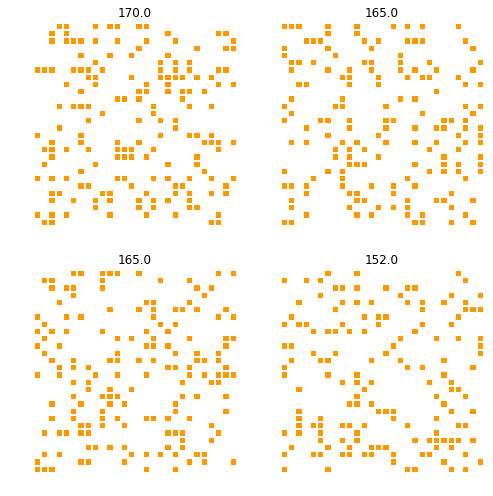

In [8]:
data_bunch.show_batch(2, figsize=(7, 7))

# Create CNN

In [14]:
learn = create_cnn(data_bunch, models.resnet34)

In [ ]:
learn.lr_find()
learn.recorder.plot()
learn.recorder.plot_lr(show_moms=True)

epoch,train_loss,valid_loss,time


In [ ]:
lr = 5e-2  # 4.79E-02 # 5e-03 #1e-02 #4.79E-02

In [ ]:
%%time
learn.fit_one_cycle(35, slice(lr))

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_losses()
plt.ylim(0, 40)

In [ ]:
learn.recorder.plot_losses()
plt.ylim(0, 15)

In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')

In [ ]:
#learn.save('stage-1')

In [ ]:
#learn.load('stage-1')

In [ ]:
learn.show_results()

In [ ]:
lr /= 10
print(lr)
learn = create_cnn(data_bunch, models.resnet34)
learn.fit_one_cycle(200, slice(lr))
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_losses()
plt.ylim(0,15)

In [ ]:
learn.recorder.plot_losses()
plt.ylim(0,5.5)

In [ ]:
learn.recorder.plot_losses()
plt.ylim(0,1.0)

In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')

In [ ]:
learn = create_cnn(data_bunch, models.resnet34, ps=0)
lr = 5e-2
learn.fit_one_cycle(50, slice(lr))

In [ ]:
learn.recorder.plot_losses()
plt.ylim(0,15)

In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')

In [ ]:
learn = create_cnn(data_bunch, models.resnet34, ps=0)
lr = 5e-2
learn.fit_one_cycle(200, slice(lr), wd=0)

In [ ]:
learn.recorder.plot_losses()
plt.ylim(0, 5)

In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')

In [ ]:
learn = create_cnn(data_bunch, models.resnet34, ps=0, true_wd = False, bn_wd = False)
lr = 5e-2
learn.fit_one_cycle(50, slice(lr), wd=0)

epoch,train_loss,valid_loss,time
1,14554.225586,6520.102539,04:56
2,795.085999,23.299984,04:49
3,42.389263,11.343928,04:49
4,7.579411,8.192901,04:49
5,3.707279,3.645651,04:49
6,3.171156,3.315414,04:49
7,3.365916,15.903853,04:49
8,3.731912,1.704693,04:49
9,4.765183,5.523167,04:49
10,5.849888,9.067863,04:49


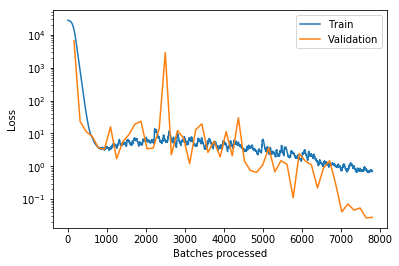

In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')

In [12]:
learn.data.dl_tfms

[]

In [ ]:
learn = create_cnn(data_bunch, models.resnet50, ps=0, true_wd = False, bn_wd = False)
lr = 6e-2
learn.fit_one_cycle(200, slice(lr), wd=0)

epoch,train_loss,valid_loss,time
1,632.328552,13.307386,01:45


In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')

In [11]:
learn = create_cnn(data_bunch, models.resnet50, ps=0, true_wd = False, bn_wd = False, metrics=mean_squared_error)
lr = 5e-2
learn.fit_one_cycle(1, slice(lr), wd=0, )

epoch,train_loss,valid_loss,mean_squared_error,time
1,77.612564,1180381952.000000,1180377600.000000,20:24


In [22]:
%%time
train = learn.validate(learn.data.train_dl)
val   = learn.validate(learn.data.valid_dl)
(val, train)

CPU times: user 8min 23s, sys: 2min 25s, total: 10min 49s
Wall time: 10min 52s


In [27]:
(train, val)

([1245188400.0, tensor(1.2452e+09)], [1180382000.0, tensor(1.1804e+09)])

In [19]:
len(learn.data.train_dl)

20000

In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')